In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
train=pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(1229, 24)
(308, 22)


In [3]:
train.head(10)

,DOJ,Sub-Function,Total years of experience (in months) at the time of joining,DOB,Nature of employment (Advisory/ Retainer/ Contractual /Permanent),Hipo Status,V Connect,Sub-Function - during hire,Designation - during hire,Function - latest,...,Institute,Benchmark company visit (Y/N),Star of business (Y/N),Employee ID,Tenure at current grade (in months),Designation - latest,Grade - latest,Date of exit (if any) (dd-mm-yyyy),Part of internal growth workshop (Y/N),Exited (Y/N)
0,11-03-13,Ore Dressing,0,30-Mar-90,Permanent,N,N,Ore Dressing,Engineer - Ore Dressing,Operations,...,"NIT-Raipur - NIT-Raipur,,",Y,N,569088,0,Engineer - Ore Dressing,M7,28-03-16,N,Y
1,10-02-14,Mechanical,0,23-Dec-91,Permanent,N,N,Mechanical,Engineer - Mechanical,Maintenance,...,Manipal Inst of Technology - Manipal Universit...,N,N,573304,0,Engineer - Mechanical,M7,23-12-14,N,Y
2,01-07-11,Mining,0,06-Oct-90,Permanent,N,N,Mining,GET - Mining,Operations,...,"CTAE , Udaipur - MPUAT-Udaipur, ,",N,N,560113,0,Engineer - Mining,M7,12-09-15,N,Y
3,15-10-05,Mining,0,03-Dec-82,Permanent,N,N,Operations,Manager - Mining,Operations,...,"BIT, Sindri",Y,N,267474,0,Manager - Mining,M4,24-08-15,N,Y
4,18-05-15,MIS,0,25-Nov-91,Permanent,N,N,Finance,Associate Manager - Finance,Finance,...,"UCCMS College-Udaipur, I.C.A.I",N,N,576220,26,Associate Manager - Finance,M6,30-06-17,N,N
5,09-03-10,Improvement Projects,0,23-May-87,Permanent,N,N,Operations,Engineer - Process,Operations,...,NIT Raipur,N,N,292902,0,Engineer - Process,M7,19-03-15,N,Y
6,04-08-14,Mining,0,14-Sep-92,Permanent,N,N,Mining,GET - Mining,Operations,...,Kakatiya University-Warangal - Kakatiya Univer...,N,N,574390,0,Engineer - Mining,M7,13-05-16,N,Y
7,08-06-09,Process,0,05-Jan-88,Permanent,N,N,Operations,Process Associate,Operations,...,University of Bikaner,N,N,285883,0,Process Associate,M9,22-02-14,N,Y
8,08-07-13,Instrumentation,0,19-Jan-91,Permanent,N,N,Instrumentation,GET - Instrumentation,Maintenance,...,"NIT-Jalandhar - NIT-Jalandhar,",N,N,571571,0,Engineer - Instrumentation,M7,02-04-14,N,Y
9,17-02-14,Power,0,09-Feb-90,Permanent,N,N,Asset Optimization,Engineer - Electrical,Operations,...,"CTAE-Udaipur - MPUAT-Udaipur, ,",N,N,573317,0,Engineer - Power,M7,22-08-15,N,Y


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 24 columns):
DOJ                                                                  1229 non-null object
Sub-Function                                                         1229 non-null object
Total years of experience (in months) at the time of joining         1229 non-null int64
DOB                                                                  1229 non-null object
Nature of employment (Advisory/ Retainer/ Contractual /Permanent)    1229 non-null object
Hipo Status                                                          1229 non-null object
V Connect                                                            1229 non-null object
Sub-Function - during hire                                           1229 non-null object
Designation - during hire                                            1229 non-null object
Function - latest                                                    1229 non-null o

In [5]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total years of experience (in months) at the time of joining,1229.0,17.894223,65.877096,0.0,0.0,0.0,0.0,463.0
Number of Internal Movements (Transfers),1229.0,0.648495,1.045445,0.0,0.0,0.0,1.0,10.0
Employee ID,1229.0,490835.161107,157410.084761,107262.0,297703.0,570705.0,576107.0,888888.0
Tenure at current grade (in months),1229.0,6.725793,12.022326,0.0,0.0,0.0,11.0,42.0


In [6]:
train.isnull().sum()

DOJ                                                                  0
Sub-Function                                                         0
Total years of experience (in months) at the time of joining         0
DOB                                                                  0
Nature of employment (Advisory/ Retainer/ Contractual /Permanent)    0
Hipo Status                                                          0
V Connect                                                            0
Sub-Function - during hire                                           0
Designation - during hire                                            0
Function - latest                                                    0
Leaders connect member (Y/N)                                         0
Function - during hire                                               0
Grade - during hire                                                  0
Number of Internal Movements (Transfers)                             0
Instit

In [7]:
combine = [train, test]

In [8]:
for df in combine:
    df['Hipo Status']=df['Hipo Status'].apply(lambda x: 0 if x=='N' else 1)
    df['V Connect']=df['V Connect'].apply(lambda x: 0 if x=='N' else 1)
    df['Leaders connect member (Y/N)']=df['Leaders connect member (Y/N)'].apply(lambda x: 0 if x=='N' else 1)
    df['Benchmark company visit (Y/N)']=df['Benchmark company visit (Y/N)'].apply(lambda x: 0 if x=='N' else 1)
    df['Star of business (Y/N)']=df['Star of business (Y/N)'].apply(lambda x: 0 if x=='N' else 1)
    df['Part of internal growth workshop (Y/N)']=df['Part of internal growth workshop (Y/N)'].apply(lambda x: 0 if x=='N' else 1)

In [9]:
train['Exited (Y/N)']=train['Exited (Y/N)'].apply(lambda x: 0 if x=='N' else 1)

In [10]:
train['Exited (Y/N)'].value_counts()/ len(train)

1    0.721725
0    0.278275
Name: Exited (Y/N), dtype: float64

In [11]:
train.head(5)

,DOJ,Sub-Function,Total years of experience (in months) at the time of joining,DOB,Nature of employment (Advisory/ Retainer/ Contractual /Permanent),Hipo Status,V Connect,Sub-Function - during hire,Designation - during hire,Function - latest,...,Institute,Benchmark company visit (Y/N),Star of business (Y/N),Employee ID,Tenure at current grade (in months),Designation - latest,Grade - latest,Date of exit (if any) (dd-mm-yyyy),Part of internal growth workshop (Y/N),Exited (Y/N)
0,11-03-13,Ore Dressing,0,30-Mar-90,Permanent,0,0,Ore Dressing,Engineer - Ore Dressing,Operations,...,"NIT-Raipur - NIT-Raipur,,",1,0,569088,0,Engineer - Ore Dressing,M7,28-03-16,0,1
1,10-02-14,Mechanical,0,23-Dec-91,Permanent,0,0,Mechanical,Engineer - Mechanical,Maintenance,...,Manipal Inst of Technology - Manipal Universit...,0,0,573304,0,Engineer - Mechanical,M7,23-12-14,0,1
2,01-07-11,Mining,0,06-Oct-90,Permanent,0,0,Mining,GET - Mining,Operations,...,"CTAE , Udaipur - MPUAT-Udaipur, ,",0,0,560113,0,Engineer - Mining,M7,12-09-15,0,1
3,15-10-05,Mining,0,03-Dec-82,Permanent,0,0,Operations,Manager - Mining,Operations,...,"BIT, Sindri",1,0,267474,0,Manager - Mining,M4,24-08-15,0,1
4,18-05-15,MIS,0,25-Nov-91,Permanent,0,0,Finance,Associate Manager - Finance,Finance,...,"UCCMS College-Udaipur, I.C.A.I",0,0,576220,26,Associate Manager - Finance,M6,30-06-17,0,0


Text(0,0.5,'Count of Employees')

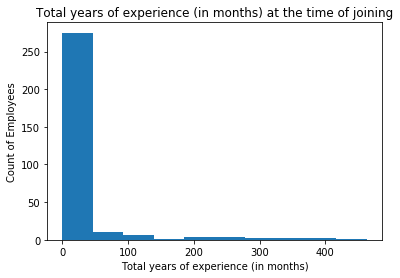

In [12]:
fig=plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Total years of experience (in months) at the time of joining'],bins=10,range= (train['Total years of experience (in months) at the time of joining'].min(),train['Total years of experience (in months) at the time of joining'].max()))
plt.title('Total years of experience (in months) at the time of joining')
plt.xlabel('Total years of experience (in months)')
plt.ylabel('Count of Employees')

In [13]:
train['Function - latest'].value_counts()

Operations            606
Maintenance           193
Commercial             96
Finance                71
Lab. Services          50
HSE                    42
Security               33
HR                     28
IT                     17
Marketing              17
BE & AO                17
Exploration            13
Medical                 9
Admin                   8
CSR                     7
Legal                   6
Secy. Services          6
Corp. Affairs           3
Technical Services      3
Administration          3
Corp. Comm.             1
Name: Function - latest, dtype: int64

In [14]:
for df in combine:
    df['Function - latest']=df['Function - latest'].map({'IT':'IT_BE&AO_Mark_Exp','BE&AO':'IT_BE&AO_Mark_Exp','Marketing':'IT_BE&AO_Mark_Exp','Exploration':'IT_BE&AO_Mark_Exp','Medical':'Others',
                                                    'Admin':'Others','CSR':'Others','Secy. Services':'Others','Legal':'Others','Technical Services':'Others','Administration':'Others','Corp. Affairs':'Others','Corp. Comm.':'Others',
                                                    'Operations':'Operations','Maintenance':'Maintenance','Commercial':'Commercial','Finance':'Finance','Lab. Services':'Lab. Services','HSE':'HSE','Security':'Security','HR':'HR'})

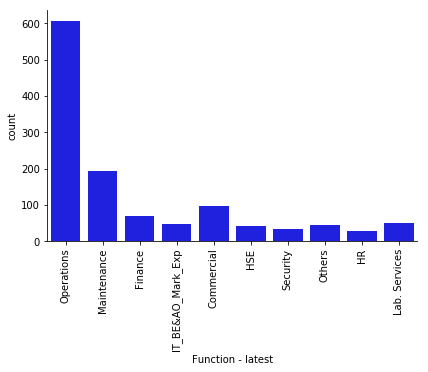

In [15]:
g = sb.factorplot("Function - latest", data=train, aspect=1.5, kind="count", color="b")
g.set_xticklabels(rotation=90)

[Text(0,0,'Operations'),
 Text(0,0,'Maintenance'),
 Text(0,0,'Finance'),
 Text(0,0,'IT_BE&AO_Mark_Exp'),
 Text(0,0,'Commercial'),
 Text(0,0,'HSE'),
 Text(0,0,'Security'),
 Text(0,0,'Others'),
 Text(0,0,'HR'),
 Text(0,0,'Lab. Services')]

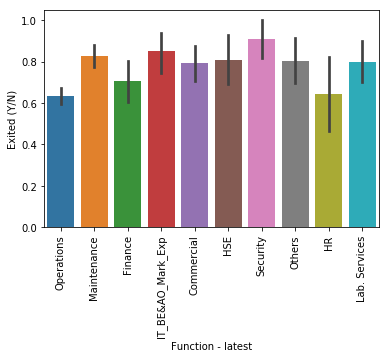

In [16]:
ax = sb.barplot(x="Function - latest", y="Exited (Y/N)",  data=train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [17]:
train['Function - during hire'].value_counts()

Operations              209
Maintenance             203
Mining                  162
Process                  82
Commercial               72
Finance                  70
Ore Dressing             56
Lab. Services            43
Security                 32
Mining Project           31
Geology                  28
HR                       28
HSE                      21
Stores                   16
IT                       15
Safety                   13
Marketing                13
Exploration              12
Medical                   9
Administration            9
Environment               8
Survey                    8
Power                     7
Legal                     6
BE & AO                   5
Paste Fill                5
Mine Planning             5
Asset Optimization        5
CSR                       5
Secy. Services            5
Mineral Processing        4
Corp. Affairs             3
Admin                     3
Rock Mechanics            3
Technical Services        3
Geotech             

In [ ]:
#df['Function - during hire']=df['Function - during hire'].map({'Safety':'IT':'IT_BE&AO_Mark_Exp','BE&AO':'IT_BE&AO_Mark_Exp','Marketing':'IT_BE&AO_Mark_Exp','Exploration':'IT_BE&AO_Mark_Exp','Medical':'Others','Admin':'Others','CSR':'Others','Secy. Services':'Others','Legal':'Others','Technical Services':'Others','Administration':'Others','Corp. Affairs':'Others','Corp. Comm.':'Others','Operations':'Operations','Maintenance':'Maintenance','Mining':'Mining','Process':'Process','Commercial':'Commercial','Finance':'Finance','Lab. Services':'Lab. Services','HSE':'HSE','Security':'Security','HR':'HR','Geology':'Geology',})

In [18]:
train['Sub-Function'].value_counts()

Mining                              252
Process                             155
Mechanical                           99
Finance                              69
Ore Dressing                         65
Electrical                           53
Lab. Services                        47
Geology                              34
Stores                               33
Security                             33
HR                                   28
Safety                               28
Instrumentation                      22
Purchase                             21
Marketing                            17
Environment                          14
Power                                14
Exploration                          13
Asset Optimization                   12
Procurement                          12
Metallurgy & Material                11
IT                                   11
Administration                       10
Geotech                               9
Medical                               9


In [19]:
train['Sub-Function - during hire'].value_counts()

Operations               197
Mining                   169
Maintenance               90
Process                   82
Finance                   70
Mechanical                59
Ore Dressing              56
Commercial                49
Lab. Services             43
Security                  32
Mining Project            31
Geology                   30
HR                        28
Electrical                28
HSE                       21
Instrumentation           19
Stores                    16
Purchase                  14
Safety                    13
Marketing                 13
Exploration               12
IT                        12
Medical                    9
Survey                     8
Power                      8
Environment                8
Administration             8
Legal                      6
BE & AO                    5
Weighbridge                5
                        ... 
Rock Mechanics             3
Admin                      3
Refractory                 2
Geotech       

In [20]:
train['Designation - during hire'].value_counts()

GET - Mining                                 175
B.Sc Trainee                                  98
Engineer - Mining                             38
Associate - Process                           37
GET - Ore Dressing                            31
B.Sc. Trainee                                 30
GET - Mechanical                              30
Associate Manager - Mechanical                29
Engineer - Mechanical                         23
Engineer - Electrical                         21
Jr. Executive - Process                       20
Geologist Trainee                             19
B.Com Trainee                                 19
Associate Manager - Mining                    18
GET - Electrical                              17
GET - Process                                 17
Associate Manager - Process                   14
Associate Manager - Finance                   14
GET - Instrumentation                         13
Engineer - Ore Dressing                       13
Associate Manager - 

In [21]:
train['Designation - latest'].value_counts()

Engineer - Mining                            192
Associate - Process                           82
Engineer - Mechanical                         45
B.Sc Trainee                                  44
Engineer - Ore Dressing                       35
Engineer - Electrical                         34
Associate Manager - Mechanical                33
Geologist                                     27
Associate - Commercial                        27
Associate Manager - Finance                   27
Engineer - Process                            24
GET - Mining                                  20
Jr. Executive - Process                       20
Associate Manager - Commercial                19
Associate - Lab. Services                     19
Associate Manager - Mining                    19
Jr. Security Officer                          17
Associate - Ore Dressing                      15
Engineer - Power                              15
Associate Manager - Process                   13
Engineer - Instrumen

In [22]:
train['Grade - during hire'].value_counts()

M7    553
M9    265
M6    168
M4     80
M8     53
M5     40
M2     27
M3     26
M1     16
P       1
Name: Grade - during hire, dtype: int64

In [23]:
train['Grade - latest'].value_counts()

M7    537
M9    251
M6    175
M4     79
M8     65
M5     51
M3     28
M2     25
M1     17
P       1
Name: Grade - latest, dtype: int64

In [24]:
# Sub-Function vs Exited (Y/N)
print(train[['Sub-Function', 'Exited (Y/N)']].groupby(['Sub-Function'], as_index=False).mean().sort_values(by='Exited (Y/N)', ascending=False))

                        Sub-Function  Exited (Y/N)
39                     Manufacturing      1.000000
60  Production & Process Engineering      1.000000
30              Improvement Projects      1.000000
32                Investor Relations      1.000000
34                  Land Acquisition      1.000000
36                     Location Head      1.000000
42                           Medical      1.000000
49                    Mining Project      1.000000
56                            Power       1.000000
58                     Process - CPP      1.000000
61                          Projects      1.000000
27                          ISO Cell      1.000000
62                          Purchase      1.000000
64                    Rock Mechanics      1.000000
65                               SAP      1.000000
68                             Scrap      1.000000
70                    Secy. Services      1.000000
74                Technical Services      1.000000
75                         Unit

In [25]:
# Nature of employment vs Exited (Y/N)
print(train[['Nature of employment (Advisory/ Retainer/ Contractual /Permanent)', 'Exited (Y/N)']].groupby(['Nature of employment (Advisory/ Retainer/ Contractual /Permanent)'], as_index=False).mean().sort_values(by='Exited (Y/N)', ascending=False))

  Nature of employment (Advisory/ Retainer/ Contractual /Permanent)  \
2                                           Retainer                  
0                                              Expat                  
1                                          Permanent                  

   Exited (Y/N)  
2      0.957447  
0      0.833333  
1      0.711111  


In [26]:
# Hipo Status vs Exited (Y/N)
print(train[['Hipo Status', 'Exited (Y/N)']].groupby(['Hipo Status'], as_index=False).mean().sort_values(by='Exited (Y/N)', ascending=False))

   Hipo Status  Exited (Y/N)
1            1      0.871795
0            0      0.716807


In [27]:
# V Connect vs Exited (Y/N)
print(train[['V Connect', 'Exited (Y/N)']].groupby(['V Connect'], as_index=False).mean().sort_values(by='Exited (Y/N)', ascending=False))

   V Connect  Exited (Y/N)
1          1      0.833333
0          0      0.721177


In [28]:
#Sub-Function - during hire vs Exited (Y/N)
print(train[['Sub-Function - during hire', 'Exited (Y/N)']].groupby(['Sub-Function - during hire'], as_index=False).mean().sort_values(by='Exited (Y/N)', ascending=False))

   Sub-Function - during hire  Exited (Y/N)
0                 Ventilation      1.000000
17       Engineering Services      1.000000
39                    Medical      1.000000
48              Ore  Dressing      1.000000
36              Manufacturing      1.000000
1                         AOC      1.000000
51                   Planning      1.000000
33              Location Head      1.000000
31           Land Acquisition      1.000000
29         Investor Relations      1.000000
27                        IT       1.000000
23                    Geotech      1.000000
54                    Project      1.000000
55                   Projects      1.000000
46            Mining Projects      1.000000
61                      Scrap      1.000000
59                        SAP      1.000000
9                        CMPC      1.000000
68                  Unit Head      1.000000
2                       Admin      1.000000
69               Ventillation      1.000000
4          Asset Optimization   

In [29]:
#Designation - during hire vs Exited (Y/N)
print(train[['Designation - during hire', 'Exited (Y/N)']].groupby(['Designation - during hire'], as_index=False).mean().sort_values(by='Exited (Y/N)', ascending=False))

                Designation - during hire  Exited (Y/N)
122                 Executive - Marketing      1.000000
146            General Manager - Projects      1.000000
149                      GeologistTrainee      1.000000
150                          Geophysicist      1.000000
152     Geophysicist Trainee - Geophysics      1.000000
153            Head -  Technical Services      1.000000
155                  Head - Geo Technical      1.000000
156                     Head - Laboratory      1.000000
157                  Head - Mine Planning      1.000000
159                       Head - Security      1.000000
160             Head - Technical (Mining)      1.000000
161             Head - Technical Services      1.000000
162           Head � Engineering Services      1.000000
163                           Jr. Chemist      1.000000
164                   Jr. Chemist Trainee      1.000000
165               Jr. Environment Trainee      1.000000
166        Jr. Executive - Administration      1

In [30]:
#Function - latest vs Exited (Y/N)
print(train[['Function - latest', 'Exited (Y/N)']].groupby(['Function - latest'], as_index=False).mean().sort_values(by='Exited (Y/N)', ascending=False))

   Function - latest  Exited (Y/N)
9           Security      0.909091
4  IT_BE&AO_Mark_Exp      0.851064
6        Maintenance      0.829016
3                HSE      0.809524
8             Others      0.804348
5      Lab. Services      0.800000
0         Commercial      0.791667
1            Finance      0.704225
2                 HR      0.642857
7         Operations      0.635314


In [31]:
train['Function - latest'].value_counts()

Operations           606
Maintenance          193
Commercial            96
Finance               71
Lab. Services         50
IT_BE&AO_Mark_Exp     47
Others                46
HSE                   42
Security              33
HR                    28
Name: Function - latest, dtype: int64

In [32]:
#Leaders connect member (Y/N) vs Exited (Y/N) 
print(train[['Leaders connect member (Y/N)', 'Exited (Y/N)']].groupby(['Leaders connect member (Y/N)'], as_index=False).mean().sort_values(by='Exited (Y/N)', ascending=False))

   Leaders connect member (Y/N)  Exited (Y/N)
1                             1       1.00000
0                             0       0.72036


In [33]:
#Function - during hire vs Exited (Y/N) 
print(train[['Function - during hire', 'Exited (Y/N)']].groupby(['Function - during hire'], as_index=False).mean().sort_values(by='Exited (Y/N)', ascending=False))

   Function - during hire  Exited (Y/N)
0             Ventilation      1.000000
15   Engineering Services      1.000000
56              Unit Head      1.000000
47               Projects      1.000000
46                Project      1.000000
44                  Power      1.000000
43               Planning      1.000000
40          Ore  Dressing      1.000000
38        Mining Projects      1.000000
32                Medical      1.000000
1                     AOC      1.000000
26     Investor Relations      1.000000
25                    IT       1.000000
21                Geotech      1.000000
29          Location Head      1.000000
14            Corp. Comm.      1.000000
12    Community Relations      1.000000
2                   Admin      1.000000
4      Asset Optimization      1.000000
5                 BE & AO      1.000000
6    Business Development      1.000000
7     Business Excellence      1.000000
8                     CEO      1.000000
9                    CMPC      1.000000


In [34]:
#Grade - during hire vs Exited (Y/N) 
print(train[['Grade - during hire', 'Exited (Y/N)']].groupby(['Grade - during hire'], as_index=False).mean().sort_values(by='Exited (Y/N)', ascending=False))

  Grade - during hire  Exited (Y/N)
7                  M8      1.000000
9                   P      1.000000
1                  M2      0.962963
3                  M4      0.937500
4                  M5      0.925000
2                  M3      0.923077
5                  M6      0.809524
8                  M9      0.698113
0                  M1      0.687500
6                  M7      0.613020


In [35]:
#Institute vs Exited (Y/N) 
print(train[['Institute', 'Exited (Y/N)']].groupby(['Institute'], as_index=False).mean().sort_values(by='Exited (Y/N)', ascending=False))

                                             Institute  Exited (Y/N)
0     - , Shri Varalakshim Polytechnic, CAD-CAM Tec...           1.0
465                  NATIONAL POWER TRAINING INSTITUTE           1.0
442  Manipal Institute of Technology-Manipal - Mani...           1.0
443                                 Manipal University           1.0
444                Medicaps Inst of T & M, RGPV-Bhopal           1.0
445           Medicaps Inst of Tech & Mgt Indore, RGPU           1.0
449  Mepco Schlenk Engg College - Anna University-C...           1.0
450          Mithibai College - Mumbai University,ICAI           1.0
464                                             NALSAR           1.0
466                             NDB Govt College-Nohar           1.0
483                                        NIT, Trichy           1.0
467   NEC-Nellore - JNTUA-Anantapur, NPTI-Neyveli (TN)           1.0
468                          NIE-MYSORE - NIE-MYSORE,            1.0
469                      NIT , Rai

In [36]:
#Benchmark company visit (Y/N) vs Exited (Y/N) 
print(train[['Benchmark company visit (Y/N)', 'Exited (Y/N)']].groupby(['Benchmark company visit (Y/N)'], as_index=False).mean().sort_values(by='Exited (Y/N)', ascending=False))

   Benchmark company visit (Y/N)  Exited (Y/N)
1                              1      0.875000
0                              0      0.715495


In [37]:
#Star of business (Y/N) vs Exited (Y/N) 
print(train[['Star of business (Y/N)', 'Exited (Y/N)']].groupby(['Star of business (Y/N)'], as_index=False).mean().sort_values(by='Exited (Y/N)', ascending=False))

   Star of business (Y/N)  Exited (Y/N)
1                       1      0.862069
0                       0      0.718333


In [38]:
#Designation - latest vs Exited (Y/N) 
print(train[['Designation - latest', 'Exited (Y/N)']].groupby(['Designation - latest'], as_index=False).mean().sort_values(by='Exited (Y/N)', ascending=False))

                          Designation - latest  Exited (Y/N)
241       Vice President � Community Relations      1.000000
134                            Executive - HR       1.000000
124                             Engineer - SAP      1.000000
126                      Engineer � Electrical      1.000000
127                      Engineer � Mechanical      1.000000
128                          Engineer � Mining      1.000000
129                           Environmentalist      1.000000
130                            Executive - CSR      1.000000
131                     Executive - Commercial      1.000000
206                          Officer - Finance      1.000000
205                 Mine Surveyor Expert-RA/UG      1.000000
135                Executive - Instrumentation      1.000000
93                               B Com Trainee      1.000000
136                  Executive - Lab. Services      1.000000
137                      Executive - Marketing      1.000000
204                     

In [39]:
#Grade - latest vs Exited (Y/N) 
print(train[['Grade - latest', 'Exited (Y/N)']].groupby(['Grade - latest'], as_index=False).mean().sort_values(by='Exited (Y/N)', ascending=False))

  Grade - latest  Exited (Y/N)
9              P      1.000000
7             M8      0.984615
1             M2      0.960000
4             M5      0.941176
3             M4      0.936709
2             M3      0.928571
5             M6      0.817143
0             M1      0.705882
8             M9      0.685259
6             M7      0.601490


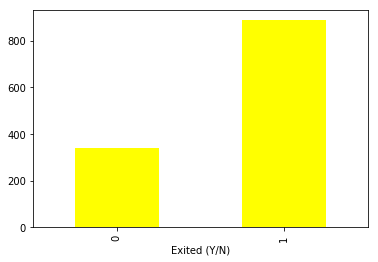

In [40]:
#prediction labels
train.groupby('Exited (Y/N)').size().plot(kind='bar', color='yellow')

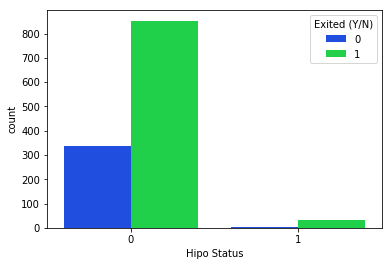

In [41]:
sb.countplot(x="Hipo Status", hue="Exited (Y/N)", data=train, palette="bright")

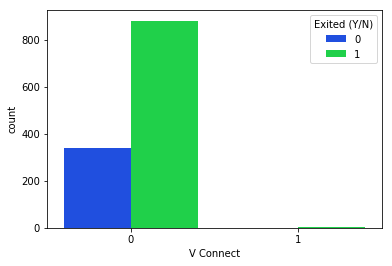

In [42]:
sb.countplot(x="V Connect", hue="Exited (Y/N)", data=train, palette="bright")

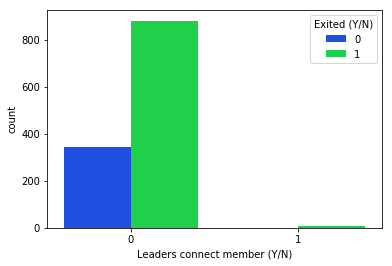

In [43]:
sb.countplot(x="Leaders connect member (Y/N)", hue="Exited (Y/N)", data=train, palette="bright")

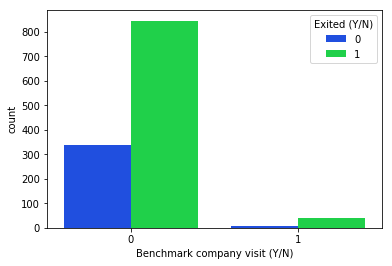

In [44]:
sb.countplot(x="Benchmark company visit (Y/N)", hue="Exited (Y/N)", data=train, palette="bright")

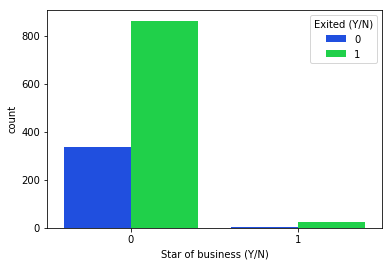

In [45]:
sb.countplot(x="Star of business (Y/N)", hue="Exited (Y/N)", data=train, palette="bright")

In [46]:
train['DOJ'] = pd.to_datetime(train['DOJ'])
train['Date of exit (if any) (dd-mm-yyyy)'] = pd.to_datetime(train['Date of exit (if any) (dd-mm-yyyy)'])
train['Job_duration'] = ((train['Date of exit (if any) (dd-mm-yyyy)']- train['DOJ'])/ np.timedelta64(1, 'M')).astype(int)
train['Job_duration']

0        28
1         2
2        59
3       118
4        25
5        54
6        25
7        54
8         5
9        18
10       24
11       48
12       42
13       12
14       39
15       26
16       40
17       33
18      313
19        7
20       46
21        7
22       30
23       24
24       54
25       38
26      313
27       40
28       42
29        4
       ... 
1199     12
1200     10
1201     32
1202     35
1203     12
1204     26
1205     10
1206     70
1207    301
1208     35
1209     31
1210     36
1211     39
1212     20
1213    406
1214     47
1215     81
1216     38
1217     40
1218     22
1219     24
1220     17
1221     47
1222     32
1223     49
1224     11
1225     27
1226      4
1227     45
1228    283
Name: Job_duration, Length: 1229, dtype: int32

In [47]:
train['DOB'] = pd.to_datetime(train['DOB'])
train['Age'] = ((train['Date of exit (if any) (dd-mm-yyyy)']- train['DOB'])/ np.timedelta64(1, 'Y')).astype(int)
train['Age']

0       25
1       23
2       25
3       32
4       25
5       27
6       23
7       26
8       23
9       25
10      24
11      26
12      26
13      23
14      24
15      27
16      25
17      38
18     -41
19      20
20      29
21      22
22     -49
23      24
24      29
25      25
26     -49
27      24
28      34
29      24
        ..
1199    23
1200    23
1201    24
1202    29
1203    22
1204    26
1205   -36
1206    28
1207   -51
1208    24
1209    24
1210    24
1211    25
1212    24
1213   -41
1214    33
1215    31
1216    24
1217    25
1218    21
1219    30
1220    24
1221    28
1222    24
1223    28
1224   -33
1225    23
1226    22
1227    25
1228   -52
Name: Age, Length: 1229, dtype: int32

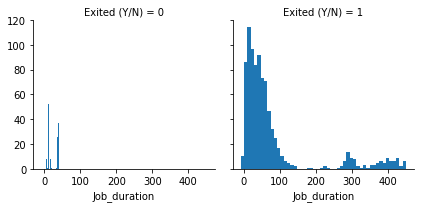

In [48]:
g = sb.FacetGrid(train, col='Exited (Y/N)')
g.map(plt.hist, 'Job_duration', bins=50)

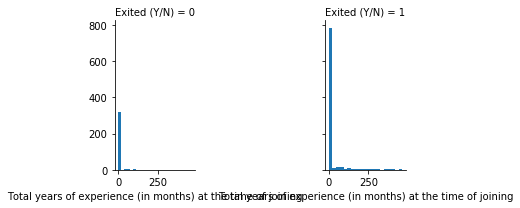

In [49]:
g = sb.FacetGrid(train, col='Exited (Y/N)')
g.map(plt.hist, 'Total years of experience (in months) at the time of joining', bins=20)

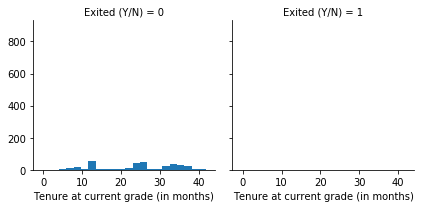

In [50]:
g = sb.FacetGrid(train, col='Exited (Y/N)')
g.map(plt.hist, 'Tenure at current grade (in months)', bins=20)

In [51]:
train =train.drop(['DOJ', 'DOB','Institute','Employee ID','Date of exit (if any) (dd-mm-yyyy)','Tenure at current grade (in months)'], axis=1)


In [52]:
test =test.drop(['DOJ', 'DOB','Institute','Employee ID','Tenure at current grade (in months)'], axis=1)


In [53]:
train.shape

(1229, 20)

In [54]:
test.shape

(308, 17)

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 20 columns):
Sub-Function                                                         1229 non-null object
Total years of experience (in months) at the time of joining         1229 non-null int64
Nature of employment (Advisory/ Retainer/ Contractual /Permanent)    1229 non-null object
Hipo Status                                                          1229 non-null int64
V Connect                                                            1229 non-null int64
Sub-Function - during hire                                           1229 non-null object
Designation - during hire                                            1229 non-null object
Function - latest                                                    1212 non-null object
Leaders connect member (Y/N)                                         1229 non-null int64
Function - during hire                                               1229 non-null obje

In [56]:
train =train.drop(['Sub-Function - during hire', 'Designation - during hire','Designation - latest','Sub-Function','Age'], axis=1)
train.shape

(1229, 15)

In [57]:
test =test.drop(['Sub-Function - during hire', 'Designation - during hire','Designation - latest','Sub-Function'], axis=1)
test.shape

(308, 13)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 15 columns):
Total years of experience (in months) at the time of joining         1229 non-null int64
Nature of employment (Advisory/ Retainer/ Contractual /Permanent)    1229 non-null object
Hipo Status                                                          1229 non-null int64
V Connect                                                            1229 non-null int64
Function - latest                                                    1212 non-null object
Leaders connect member (Y/N)                                         1229 non-null int64
Function - during hire                                               1229 non-null object
Grade - during hire                                                  1229 non-null object
Number of Internal Movements (Transfers)                             1229 non-null int64
Benchmark company visit (Y/N)                                        1229 non-null int64

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 13 columns):
Total years of experience (in months) at the time of joining         308 non-null int64
Nature of employment (Advisory/ Retainer/ Contractual /Permanent)    308 non-null object
Hipo Status                                                          308 non-null int64
V Connect                                                            308 non-null int64
Function - latest                                                    305 non-null object
Leaders connect member (Y/N)                                         308 non-null int64
Function - during hire                                               308 non-null object
Grade - during hire                                                  308 non-null object
Number of Internal Movements (Transfers)                             308 non-null int64
Benchmark company visit (Y/N)                                        308 non-null int64
Star of bus

In [60]:
train.head(10)

,Total years of experience (in months) at the time of joining,Nature of employment (Advisory/ Retainer/ Contractual /Permanent),Hipo Status,V Connect,Function - latest,Leaders connect member (Y/N),Function - during hire,Grade - during hire,Number of Internal Movements (Transfers),Benchmark company visit (Y/N),Star of business (Y/N),Grade - latest,Part of internal growth workshop (Y/N),Exited (Y/N),Job_duration
0,0,Permanent,0,0,Operations,0,Ore Dressing,M7,1,1,0,M7,0,1,28
1,0,Permanent,0,0,Maintenance,0,Maintenance,M7,0,0,0,M7,0,1,2
2,0,Permanent,0,0,Operations,0,Mining,M7,0,0,0,M7,0,1,59
3,0,Permanent,0,0,Operations,0,Operations,M4,0,1,0,M4,0,1,118
4,0,Permanent,0,0,Finance,0,Finance,M6,1,0,0,M6,0,0,25
5,0,Permanent,0,0,Operations,0,Operations,M7,0,0,0,M7,0,1,54
6,0,Permanent,0,0,Operations,0,Mining,M7,0,0,0,M7,0,1,25
7,0,Permanent,0,0,Operations,0,Operations,M9,0,0,0,M9,0,1,54
8,0,Permanent,0,0,Maintenance,0,Maintenance,M7,0,0,0,M7,0,1,5
9,0,Permanent,0,0,Operations,0,Asset Optimization,M7,2,0,0,M7,0,1,18


In [61]:
X=train.drop('Exited (Y/N)',axis=1)
y=train['Exited (Y/N)']

In [62]:
X.shape

(1229, 14)

In [63]:
X=pd.get_dummies(X)

In [64]:
test=pd.get_dummies(test)

In [65]:
X.head(10)

,Total years of experience (in months) at the time of joining,Hipo Status,V Connect,Leaders connect member (Y/N),Number of Internal Movements (Transfers),Benchmark company visit (Y/N),Star of business (Y/N),Part of internal growth workshop (Y/N),Job_duration,Nature of employment (Advisory/ Retainer/ Contractual /Permanent)_Expat,...,Grade - latest_M1,Grade - latest_M2,Grade - latest_M3,Grade - latest_M4,Grade - latest_M5,Grade - latest_M6,Grade - latest_M7,Grade - latest_M8,Grade - latest_M9,Grade - latest_P
0,0,0,0,0,1,1,0,0,28,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,59,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,118,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,25,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,54,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,25,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,54,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,2,0,0,0,18,0,...,0,0,0,0,0,0,1,0,0,0


In [66]:
X.columns

Index(['Total years of experience (in months) at the time of joining',
       'Hipo Status', 'V Connect', 'Leaders connect member (Y/N)',
       'Number of Internal Movements (Transfers)',
       'Benchmark company visit (Y/N)', 'Star of business (Y/N)',
       'Part of internal growth workshop (Y/N)', 'Job_duration',
       'Nature of employment (Advisory/ Retainer/ Contractual /Permanent)_Expat',
       'Nature of employment (Advisory/ Retainer/ Contractual /Permanent)_Permanent',
       'Nature of employment (Advisory/ Retainer/ Contractual /Permanent)_Retainer',
       'Function - latest_Commercial', 'Function - latest_Finance',
       'Function - latest_HR', 'Function - latest_HSE',
       'Function - latest_IT_BE&AO_Mark_Exp',
       'Function - latest_Lab. Services', 'Function - latest_Maintenance',
       'Function - latest_Operations', 'Function - latest_Others',
       'Function - latest_Security', 'Function - during hire_ Ventilation',
       'Function - during hire_AOC', 'F

In [67]:
test.columns

Index(['Total years of experience (in months) at the time of joining',
       'Hipo Status', 'V Connect', 'Leaders connect member (Y/N)',
       'Number of Internal Movements (Transfers)',
       'Benchmark company visit (Y/N)', 'Star of business (Y/N)',
       'Part of internal growth workshop (Y/N)',
       'Nature of employment (Advisory/ Retainer/ Contractual /Permanent)_Expat',
       'Nature of employment (Advisory/ Retainer/ Contractual /Permanent)_Permanent',
       'Nature of employment (Advisory/ Retainer/ Contractual /Permanent)_Retainer',
       'Function - latest_Commercial', 'Function - latest_Finance',
       'Function - latest_HR', 'Function - latest_HSE',
       'Function - latest_IT_BE&AO_Mark_Exp',
       'Function - latest_Lab. Services', 'Function - latest_Maintenance',
       'Function - latest_Operations', 'Function - latest_Others',
       'Function - latest_Security', 'Function - during hire_Administration',
       'Function - during hire_Asset Optimization',
 

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [69]:
#benchmark model(Logistic Regression)
from sklearn.linear_model import LogisticRegression
clf0 = LogisticRegression(random_state=10)
clf0.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
y_pred = clf0.predict(X_test)
accuracy_regr=accuracy_score(y_test, y_pred)
precision_regr=precision_score(y_test, y_pred,average='weighted')
recall_regr=recall_score(y_test, y_pred,average='weighted')
f1_regr=f1_score(y_test,y_pred,average='weighted')
print("accuracy:", accuracy_regr)
print("Precision:", precision_regr)
print("Recall:", recall_regr)
print('f1_score:',f1_regr)

accuracy: 0.7804878048780488
Precision: 0.7703323620575567
Recall: 0.7804878048780488
f1_score: 0.7704808529884751


In [71]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier(random_state=10)
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [72]:
y_pred1 = rf1.predict(X_test)
accuracy_rf1=accuracy_score(y_test, y_pred1)
precision_rf1=precision_score(y_test, y_pred1,average='weighted')
recall_rf1=recall_score(y_test, y_pred1,average='weighted')
f1_rf1=f1_score(y_test,y_pred1,average='weighted')
print("accuracy:", accuracy_rf1)
print("Precision:", precision_rf1)
print("Recall:", recall_rf1)
print('f1_score:',f1_rf1)

accuracy: 0.8983739837398373
Precision: 0.8980001868984208
Recall: 0.8983739837398373
f1_score: 0.8981699843829404


In [74]:
from sklearn.model_selection import GridSearchCV
param_grid={
        'n_estimators':[100,150,200,250,300,350,400,450,500],
        'max_features':['auto','sqrt','log2']
        }
mod=GridSearchCV(estimator=rf1,param_grid=param_grid,cv=10)
mod_gridsearch=mod.fit(X_train,y_train)
mod_acc=mod_gridsearch.best_params_

In [75]:
mod_acc

{'max_features': 'auto', 'n_estimators': 300}

In [76]:
rf2=RandomForestClassifier(n_estimators=300,max_features='auto',n_jobs=-1,random_state=400)
rf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=400, verbose=0, warm_start=False)

In [77]:
y_pred2 = rf2.predict(X_test)
accuracy_rf2=accuracy_score(y_test, y_pred2)
precision_rf2=precision_score(y_test, y_pred2,average='weighted')
recall_rf2=recall_score(y_test, y_pred2,average='weighted')
f1_rf2=f1_score(y_test,y_pred2,average='weighted')
print("accuracy:", accuracy_rf2)
print("Precision:", precision_rf2)
print("Recall:", recall_rf2)
print('f1_score:',f1_rf2)

accuracy: 0.8780487804878049
Precision: 0.8760390023884627
Recall: 0.8780487804878049
f1_score: 0.8752780777973015


In [78]:
#XG boost
from xgboost import XGBClassifier
xgb=XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [80]:
y_pred3 = xgb.predict(X_test)
accuracy_xgb=accuracy_score(y_test, y_pred3)
precision_xgb=precision_score(y_test, y_pred3,average='weighted')
recall_xgb=recall_score(y_test, y_pred3,average='weighted')
f1_xgb=f1_score(y_test,y_pred3,average='weighted')
print("accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print('f1_score:',f1_xgb)

accuracy: 0.8983739837398373
Precision: 0.897097781288454
Recall: 0.8983739837398373
f1_score: 0.8972959360435575


C:\Users\Kush\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [81]:
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

C:\Users\Kush\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Kush\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [82]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.95187, std: 0.01603, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.94978, std: 0.01456, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.94841, std: 0.01607, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: 0.95350, std: 0.01382, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.95161, std: 0.01389, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.95031, std: 0.01452, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: 0.95571, std: 0.01470, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.95287, std: 0.01427, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.95040, std: 0.01585, params: {'max_depth': 6, 'min_child_weight': 6}],
 {'max_depth': 6, 'min_child_weight': 4},
 0.9557080442809914)

In [83]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_child_weight': [6, 8, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [84]:
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_

([mean: 0.94841, std: 0.01607, params: {'min_child_weight': 6},
  mean: 0.94174, std: 0.01565, params: {'min_child_weight': 8},
  mean: 0.93780, std: 0.02161, params: {'min_child_weight': 10},
  mean: 0.93003, std: 0.02233, params: {'min_child_weight': 12}],
 {'min_child_weight': 6},
 0.9484122623373221)

In [85]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.94841, std: 0.01607, params: {'gamma': 0.0},
  mean: 0.94712, std: 0.01615, params: {'gamma': 0.1},
  mean: 0.94787, std: 0.01493, params: {'gamma': 0.2},
  mean: 0.94848, std: 0.01624, params: {'gamma': 0.3},
  mean: 0.94688, std: 0.01692, params: {'gamma': 0.4}],
 {'gamma': 0.3},
 0.9484845662895092)

In [86]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.94295, std: 0.01952, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.94684, std: 0.01615, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.94744, std: 0.01662, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.94942, std: 0.01692, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.94504, std: 0.01634, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.94759, std: 0.01629, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.94880, std: 0.01491, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.95075, std: 0.01603, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.94581, std: 0.01715, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.94810, std: 0.01641, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.95023, std: 0.01620, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.95054, std: 0.01436, params: {'colsample_bytree': 0.8, 'subsample'

In [82]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=6, missing=None, n_estimators=177,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.75, 0.8, 0.85], 'colsample_bytree': [0.75, 0.8, 0.85]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [87]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train,y_train)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.94950, std: 0.01657, params: {'reg_alpha': 1e-05},
  mean: 0.94971, std: 0.01656, params: {'reg_alpha': 0.01},
  mean: 0.94941, std: 0.01705, params: {'reg_alpha': 0.1},
  mean: 0.94801, std: 0.01590, params: {'reg_alpha': 1},
  mean: 0.75967, std: 0.05798, params: {'reg_alpha': 100}],
 {'reg_alpha': 0.01},
 0.9497059146009452)

In [88]:
param_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(X_train,y_train)
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: 0.94950, std: 0.01657, params: {'reg_alpha': 0},
  mean: 0.94950, std: 0.01657, params: {'reg_alpha': 0.001},
  mean: 0.94968, std: 0.01652, params: {'reg_alpha': 0.005},
  mean: 0.94971, std: 0.01656, params: {'reg_alpha': 0.01},
  mean: 0.94974, std: 0.01606, params: {'reg_alpha': 0.05}],
 {'reg_alpha': 0.05},
 0.949740583330804)

In [89]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=6,
 min_child_weight=6,
 gamma=0.3,
 subsample=0.9,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb4.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.3, learning_rate=0.01,
       max_delta_step=0, max_depth=6, min_child_weight=6, missing=None,
       n_estimators=5000, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.9)

In [90]:
y_pred4 = xgb4.predict(X_test)
accuracy_xgb4=accuracy_score(y_test, y_pred4)
precision_xgb4=precision_score(y_test, y_pred4,average='weighted')
recall_xgb4=recall_score(y_test, y_pred4,average='weighted')
f1_xgb4=f1_score(y_test,y_pred4,average='weighted')
print("accuracy:", accuracy_xgb4)
print("Precision:", precision_xgb4)
print("Recall:", recall_xgb4)
print('f1_score:',f1_xgb4)

accuracy: 0.9065040650406504
Precision: 0.9054125761019672
Recall: 0.9065040650406504
f1_score: 0.905512261160073


C:\Users\Kush\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [94]:
missing_cols = set( X_train.columns ) - set( test.columns )
for c in missing_cols:
    test[c] = 0
test = test[X_train.columns]

In [97]:
test['Exited (Y/N)'] = xgb4.predict(test)

C:\Users\Kush\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Kush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
test['Exited (Y/N)']=test['Exited (Y/N)'].apply(lambda x: 'N' if x==0 else 'Y')

C:\Users\Kush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
test['Exited (Y/N)']

0      Y
1      Y
2      Y
3      Y
4      Y
5      N
6      Y
7      Y
8      Y
9      N
10     Y
11     Y
12     Y
13     Y
14     Y
15     Y
16     Y
17     N
18     Y
19     Y
20     Y
21     Y
22     Y
23     Y
24     N
25     Y
26     Y
27     N
28     Y
29     Y
      ..
278    Y
279    Y
280    Y
281    Y
282    Y
283    N
284    Y
285    N
286    Y
287    Y
288    Y
289    Y
290    Y
291    Y
292    Y
293    Y
294    Y
295    N
296    Y
297    Y
298    Y
299    Y
300    Y
301    Y
302    N
303    Y
304    Y
305    Y
306    Y
307    N
Name: Exited (Y/N), Length: 308, dtype: object